In [ ]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision

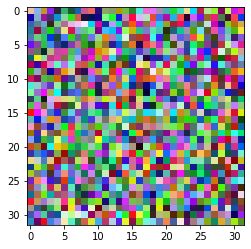

In [ ]:
X = torch.randn(1, 3, 32, 32)

img = X[0]
img = img.numpy()
img = np.transpose(img, (1, 2, 0))
plt.imshow((img * 255).astype(np.uint8))
plt.show()

In [ ]:
y = torch.randint(3, (1, 32, 32), dtype = torch.int64)
y

tensor([[[0, 0, 1,  ..., 0, 2, 1],
         [0, 2, 2,  ..., 0, 0, 0],
         [0, 2, 0,  ..., 0, 1, 0],
         ...,
         [2, 1, 2,  ..., 1, 0, 0],
         [0, 2, 0,  ..., 2, 2, 0],
         [1, 2, 2,  ..., 2, 2, 0]]])

# MaxPool2D

## Official MaxPool2D

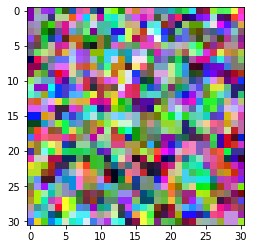

In [ ]:
maxpool2d = torch.nn.MaxPool2d(kernel_size = 2, stride = 1, padding = 0, dilation = 1, return_indices = False, ceil_mode = False)
torch_out = maxpool2d(X)
img = torch_out[0]
img = img.numpy()
img = np.transpose(img, (1, 2, 0))
plt.imshow((img * 255).astype(np.uint8))
plt.show()

## My MaxPool2D

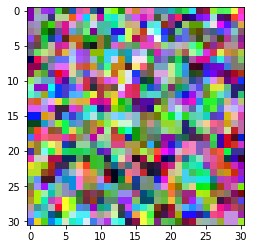

In [ ]:
class MyMaxPool2D(nn.Module):
  def __init__(self, kernel_size, stride):
    super(MyMaxPool2D, self).__init__()
    self.stride = stride
    self.kernel_size = kernel_size
    self.kernel_height = kernel_size[0]
    self.kernel_width = kernel_size[1]

  def forward(self, x):
    x_batch = x.size(0)
    x_channel = x.size(1)
    x_height = x.size(2)
    x_width = x.size(3)

    y_height = int((x_height - self.kernel_height) / self.stride) + 1
    y_width = int((x_width - self.kernel_width) / self.stride) + 1
    y = torch.zeros((x_batch, x_channel, y_height, y_width))
    
    for i in range(x_batch):
      for j in range(x_channel):
        for k in range(y_height):
          for l in range(y_width):
            start_k = k * self.stride
            start_l = l * self.stride
            end_k = start_k + self.kernel_height
            end_l = start_l + self.kernel_width
            y[i, j, k, l] = torch.max(x[i, j, start_k:end_k, start_l:end_l])
    
    return y

mymaxpool2d = MyMaxPool2D(kernel_size = (2, 2), stride = 1)
my_out = mymaxpool2d(X)
img = my_out[0]
img = img.numpy()
img = np.transpose(img, (1, 2, 0))
plt.imshow((img * 255).astype(np.uint8))
plt.show()

## Comparision

In [ ]:
print(torch.all(torch.abs(my_out - torch_out) <= 1e-6))

tensor(True)


# AveragePool2D

## Official AveragePool2D

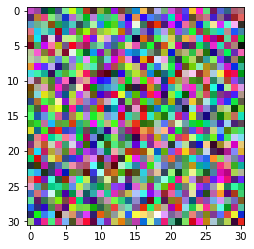

In [ ]:
avgpool2d = torch.nn.AvgPool2d(kernel_size = 2, stride = 1, 
                               padding = 0, ceil_mode = False, 
                               count_include_pad = True,  
                               divisor_override = None)
torch_out = avgpool2d(X)
img = torch_out[0]
img = img.numpy()
img = np.transpose(img, (1, 2, 0))
plt.imshow((img * 255).astype(np.uint8))
plt.show()

## My AveragePool2D

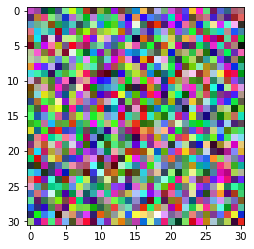

In [ ]:
class MyAveragePool2D(nn.Module):
  def __init__(self, kernel_size, stride):
    super(MyAveragePool2D, self).__init__()
    self.stride = stride
    self.kernel_size = kernel_size
    self.kernel_height = kernel_size[0]
    self.kernel_width = kernel_size[1]

  def forward(self, x):
    x_batch = x.size(0)
    x_channel = x.size(1)
    x_height = x.size(2)
    x_width = x.size(3)

    y_height = int((x_height - self.kernel_height) / self.stride) + 1
    y_width = int((x_width - self.kernel_width) / self.stride) + 1
    y = torch.zeros((x_batch, x_channel, y_height, y_width))
    
    for i in range(x_batch):
      for j in range(x_channel):
        for k in range(y_height):
          for l in range(y_width):
            start_k = k * self.stride
            start_l = l * self.stride
            end_k = start_k + self.kernel_height
            end_l = start_l + self.kernel_width
            y[i, j, k, l] = x[i, j, start_k:end_k, start_l:end_l].mean()
    
    return y

myavgpool2d = MyAveragePool2D(kernel_size = (2, 2), stride = 1)
my_out = myavgpool2d(X)
img = my_out[0]
img = img.numpy()
img = np.transpose(img, (1, 2, 0))
plt.imshow((img * 255).astype(np.uint8))
plt.show()

## Comparision

In [ ]:
print(torch.all(torch.abs(my_out - torch_out) <= 1e-6))

tensor(True)


# Conv2D I

## Official Conv2D

In [ ]:
conv2d = torch.nn.Conv2d(in_channels=3, out_channels=6, 
                         kernel_size=3, stride=1, 
                         padding=0, dilation=1, 
                         groups=1, bias=True, 
                         padding_mode='zeros')
torch_out = conv2d(X)
torch_kernel = conv2d.weight.data
torch_bias = conv2d.bias.data
print(torch_out)

tensor([[[[ 6.4541e-01, -4.9002e-02, -8.2768e-01,  ...,  5.3109e-01,
            9.8171e-01,  7.2008e-01],
          [-2.2148e-01,  9.1171e-02,  3.8695e-01,  ...,  7.0360e-01,
            5.2570e-01,  6.2671e-01],
          [ 2.7258e-02,  2.3801e-01,  5.0505e-01,  ..., -7.0291e-01,
            5.3436e-01, -8.5201e-01],
          ...,
          [-4.4795e-01, -2.6910e-02,  1.5481e+00,  ...,  1.9305e-01,
            1.2381e+00,  4.4610e-02],
          [ 2.2510e-01,  2.6381e-01, -1.7242e+00,  ..., -8.7501e-01,
            3.1584e-01, -4.4386e-02],
          [ 1.3277e-01, -1.8953e-02,  1.6660e+00,  ...,  8.1455e-01,
            3.9618e-01,  3.8421e-01]],

         [[ 4.2638e-01, -1.2006e+00, -3.8792e-01,  ..., -4.4870e-01,
            7.3663e-01,  6.9282e-01],
          [ 3.1160e-02, -6.0829e-02, -3.4389e-01,  ..., -2.9859e-01,
           -2.8173e-01,  2.5025e-01],
          [-4.1580e-02, -1.7141e-01,  2.0877e-01,  ..., -3.4345e-01,
           -2.9346e-01, -3.0556e-01],
          ...,
     

## My Conv2D

In [ ]:
class Myconv2d(nn.Module):
  def __init__(self, in_channels, out_channels, kernel_size, stride, bias):
    super(Myconv2d, self).__init__()
    self.stride = stride
    self.kernel_size = kernel_size
    self.kernel_height = kernel_size[0]
    self.kernel_width = kernel_size[1]
    self.in_channels = in_channels
    self.out_channels = out_channels
    self.bias = bias

  def forward(self, x):
    x_batch = x.size(0)
    x_channel = x.size(1)
    x_height = x.size(2)
    x_width = x.size(3)
    
    y_height = int((x_height - self.kernel_height) / self.stride) + 1
    y_width = int((x_width - self.kernel_width) / self.stride) + 1
    y_channels = self.out_channels
    y = torch.zeros((x_batch, y_channels, y_height, y_width))
    
    for a in range(x_batch):
      for b in range(y_channels):
        for c in range(x_channel):
          for i in range(y_height):
            for j in range(y_width):
              start_i = i * self.stride
              start_j = j * self.stride
              end_i = start_i + self.kernel_height
              end_j = start_j + self.kernel_width
              y[a, b, i, j] += (x[a, c, start_i:end_i, start_j:end_j] * torch_kernel[b][c]).sum()
    
    for i in range(y_channels):
      y[0][i] += torch_bias[i]

    return y

myconv2D = Myconv2d(in_channels = 3, out_channels = 6, 
                    kernel_size = (3 ,3), stride = 1, 
                    bias = torch_bias)
my_out = myconv2D(X)
print(my_out)

tensor([[[[ 6.4541e-01, -4.9002e-02, -8.2768e-01,  ...,  5.3109e-01,
            9.8171e-01,  7.2008e-01],
          [-2.2148e-01,  9.1171e-02,  3.8695e-01,  ...,  7.0360e-01,
            5.2570e-01,  6.2671e-01],
          [ 2.7258e-02,  2.3801e-01,  5.0505e-01,  ..., -7.0291e-01,
            5.3436e-01, -8.5201e-01],
          ...,
          [-4.4795e-01, -2.6910e-02,  1.5481e+00,  ...,  1.9305e-01,
            1.2381e+00,  4.4610e-02],
          [ 2.2510e-01,  2.6381e-01, -1.7242e+00,  ..., -8.7501e-01,
            3.1584e-01, -4.4386e-02],
          [ 1.3277e-01, -1.8953e-02,  1.6660e+00,  ...,  8.1455e-01,
            3.9618e-01,  3.8421e-01]],

         [[ 4.2638e-01, -1.2006e+00, -3.8792e-01,  ..., -4.4870e-01,
            7.3663e-01,  6.9282e-01],
          [ 3.1160e-02, -6.0829e-02, -3.4389e-01,  ..., -2.9859e-01,
           -2.8173e-01,  2.5025e-01],
          [-4.1580e-02, -1.7141e-01,  2.0877e-01,  ..., -3.4345e-01,
           -2.9346e-01, -3.0556e-01],
          ...,
     

## Comparision

In [ ]:
print(torch.all(torch.abs(my_out - torch_out) <= 1e-6))

tensor(True)


# Conv2D II

## Official Conv2D

In [ ]:
conv2d = torch.nn.Conv2d(in_channels=3, out_channels=6, 
                         kernel_size=5, stride=2, 
                         padding=0, dilation=2, 
                         groups=1, bias=True, 
                         padding_mode='zeros')
torch_out = conv2d(X)
torch_kernel = conv2d.weight.data
torch_bias = conv2d.bias.data
print(torch_out)

tensor([[[[ 5.2668e-01, -2.8034e-01,  3.6539e-01, -9.5675e-01,  5.9627e-01,
           -6.9093e-01, -1.8938e+00,  1.4877e-02,  9.5674e-01,  2.7156e-01,
           -1.6594e-01,  4.0911e-01],
          [ 8.0104e-01,  8.0244e-02, -9.6878e-01, -7.2762e-01, -8.2155e-02,
            7.3324e-02,  3.6484e-02, -1.7749e-01, -3.5964e-01, -2.1342e-01,
            4.4991e-01,  1.4061e+00],
          [ 3.9626e-01, -5.4469e-02, -1.1179e+00, -1.1882e-01,  6.8619e-01,
            6.6385e-01, -2.7402e-01, -2.8063e-02,  3.7972e-01,  7.9659e-02,
           -7.0091e-01, -5.9341e-01],
          [-5.6028e-01,  1.3821e-02,  1.6670e-01,  3.4714e-01, -5.4297e-01,
           -2.4029e-01,  7.1688e-02,  2.2234e-01, -5.1996e-02,  5.4929e-02,
           -1.0152e-01,  1.1074e-01],
          [-8.2180e-02,  5.7842e-01, -4.5866e-01, -4.0539e-01,  3.8999e-01,
            6.2895e-01, -6.5914e-01, -6.7251e-01, -6.6775e-02, -1.0620e+00,
           -7.3400e-01,  8.3110e-01],
          [-8.8580e-02,  6.1221e-01,  6.2823e-01, 

## My Conv2D

In [ ]:
class Myconv2d(nn.Module):
  def __init__(self, in_channels, out_channels, kernel_size, stride, bias, dilation):
    super(Myconv2d, self).__init__()
    self.stride = stride
    self.kernel_size = kernel_size
    self.kernel_height = kernel_size[0]
    self.kernel_width = kernel_size[1]
    self.in_channels = in_channels
    self.out_channels = out_channels
    self.height = self.kernel_height * dilation - 1
    self.width = self.kernel_width * dilation - 1
    self.bias = bias
    self.dilation = dilation

  def forward(self, x):
    x_batch = x.size(0)
    x_channel = x.size(1)
    x_height = x.size(2)
    x_width = x.size(3)
    
    y_height = int((x_height - self.height) / self.stride) + 1
    y_width = int((x_width - self.width) / self.stride) + 1
    y_channels = self.out_channels
    y = torch.zeros((x_batch, y_channels, y_height, y_width))

    kernel = torch.zeros((y_channels, x_channel, self.height, self.width))

    for a in range(y_channels):
      for b in range(x_channel):
        for i in range(self.kernel_height):
          for j in range(self.kernel_width):
            kernel[a, b, i * self.dilation, j * self.dilation] = torch_kernel[a, b, i, j]
    
    for a in range(x_batch):
      for b in range(y_channels):
        for c in range(x_channel):
          for i in range(y_height):
            for j in range(y_width):
              start_i = i * self.stride
              start_j = j * self.stride
              end_i = start_i + self.height
              end_j = start_j + self.width
              y[a, b, i, j] += (x[a, c, start_i:end_i, start_j:end_j] * kernel[b][c]).sum()
    
    for i in range(y_channels):
      y[0][i] += torch_bias[i]

    return y

myconv2D = Myconv2d(in_channels = 3, out_channels = 6, 
                    kernel_size = (5 ,5), stride = 2, 
                    bias = torch_bias, dilation = 2)
my_out = myconv2D(X)
print(my_out)

tensor([[[[ 5.2668e-01, -2.8034e-01,  3.6539e-01, -9.5675e-01,  5.9627e-01,
           -6.9093e-01, -1.8938e+00,  1.4877e-02,  9.5674e-01,  2.7156e-01,
           -1.6594e-01,  4.0911e-01],
          [ 8.0104e-01,  8.0244e-02, -9.6878e-01, -7.2762e-01, -8.2155e-02,
            7.3324e-02,  3.6484e-02, -1.7749e-01, -3.5964e-01, -2.1342e-01,
            4.4991e-01,  1.4061e+00],
          [ 3.9626e-01, -5.4469e-02, -1.1179e+00, -1.1882e-01,  6.8619e-01,
            6.6385e-01, -2.7402e-01, -2.8063e-02,  3.7972e-01,  7.9659e-02,
           -7.0091e-01, -5.9341e-01],
          [-5.6028e-01,  1.3821e-02,  1.6670e-01,  3.4714e-01, -5.4297e-01,
           -2.4029e-01,  7.1688e-02,  2.2235e-01, -5.1996e-02,  5.4929e-02,
           -1.0152e-01,  1.1074e-01],
          [-8.2180e-02,  5.7841e-01, -4.5866e-01, -4.0539e-01,  3.8999e-01,
            6.2895e-01, -6.5914e-01, -6.7251e-01, -6.6775e-02, -1.0620e+00,
           -7.3400e-01,  8.3110e-01],
          [-8.8580e-02,  6.1221e-01,  6.2823e-01, 

## Comparision

In [ ]:
print(torch.all(torch.abs(my_out - torch_out) <= 1e-6))

tensor(True)


# ConvTranspose2D

## Official ConvTranspose2D

In [ ]:
convtrans2d = torch.nn.ConvTranspose2d(in_channels=3, out_channels=4, 
                                       kernel_size=3, stride=1, 
                                       padding=0, output_padding=0, 
                                       groups=1, bias=True, dilation=1, 
                                       padding_mode='zeros')
torch_out = convtrans2d(X)
torch_kernel = convtrans2d.weight.data
torch_bias = convtrans2d.bias.data
print(torch_out)

tensor([[[[-0.1875, -0.0580,  0.2780,  ..., -0.2500,  0.0985, -0.0951],
          [-0.2115, -0.0117, -0.2752,  ..., -0.5434, -0.5616, -0.2735],
          [-0.0766,  0.0404, -0.6098,  ..., -0.1139,  0.2423, -0.3693],
          ...,
          [-0.1570, -0.2066, -0.7593,  ..., -0.3439,  0.8440,  0.4111],
          [-0.0271, -0.1189, -0.7089,  ...,  0.2109,  0.3280, -0.3835],
          [-0.1119, -0.2132, -0.1884,  ..., -0.0097, -0.4290, -0.1717]],

         [[-0.2105, -0.1217,  0.1712,  ...,  0.0183, -0.2574, -0.0884],
          [-0.1386, -0.5646, -0.5502,  ..., -1.1563, -0.1516, -0.0799],
          [-0.0122, -0.1734, -0.9958,  ..., -0.2760, -0.8973, -0.5357],
          ...,
          [-0.1541,  0.2139, -0.2086,  ..., -0.6752, -0.4611,  0.2464],
          [-0.0919, -0.0493, -0.6416,  ..., -0.4578, -0.0297, -0.1538],
          [-0.1870, -0.3023, -0.0679,  ...,  0.1854, -0.3305, -0.3510]],

         [[ 0.0181,  0.0500, -0.3610,  ...,  0.2988, -0.1103,  0.0050],
          [ 0.1903,  0.0180,  

## My ConvTranspose2D

In [ ]:
class Myconvtrans2d(nn.Module):
  def __init__(self, in_channels, out_channels, kernel_size, stride, bias, dilation):
    super(Myconvtrans2d, self).__init__()
    self.stride = stride
    self.kernel_size = kernel_size
    self.kernel_height = kernel_size[0]
    self.kernel_width = kernel_size[1]
    self.in_channels = in_channels
    self.out_channels = out_channels
    self.bias = bias
    self.dilation = dilation

  def forward(self, x):
    x_batch = x.size(0)
    x_channel = x.size(1)
    x_height = x.size(2)
    x_width = x.size(3)
    
    y_height = (x_height + self.kernel_height) - 1
    y_width = (x_width + self.kernel_width) - 1
    y_channels = self.out_channels
    y = torch.zeros((x_batch, y_channels, y_height, y_width))
    
    for a in range(x_batch):
      for b in range(y_channels):
        for c in range(x_channel):
          for i in range(x_height):
            for j in range(x_width):
              y[a, b, i:i + self.kernel_height, j:j + self.kernel_width] += x[a, c, i, j] * torch_kernel[c][b]
    
    for i in range(y_channels):
      y[0][i] += torch_bias[i]

    return y

myconv2D = Myconvtrans2d(in_channels=3, out_channels=4, 
                         kernel_size=(3, 3), stride=1, 
                         bias=torch_bias, dilation=1)
my_out = myconv2D(X)
print(my_out)

tensor([[[[-0.1875, -0.0580,  0.2780,  ..., -0.2500,  0.0985, -0.0951],
          [-0.2115, -0.0117, -0.2752,  ..., -0.5434, -0.5616, -0.2735],
          [-0.0766,  0.0404, -0.6098,  ..., -0.1139,  0.2423, -0.3693],
          ...,
          [-0.1570, -0.2066, -0.7593,  ..., -0.3439,  0.8440,  0.4111],
          [-0.0271, -0.1189, -0.7089,  ...,  0.2109,  0.3280, -0.3835],
          [-0.1119, -0.2132, -0.1884,  ..., -0.0097, -0.4290, -0.1717]],

         [[-0.2105, -0.1217,  0.1712,  ...,  0.0183, -0.2574, -0.0884],
          [-0.1386, -0.5646, -0.5502,  ..., -1.1563, -0.1516, -0.0799],
          [-0.0122, -0.1734, -0.9958,  ..., -0.2760, -0.8973, -0.5357],
          ...,
          [-0.1541,  0.2139, -0.2086,  ..., -0.6752, -0.4611,  0.2464],
          [-0.0919, -0.0493, -0.6416,  ..., -0.4578, -0.0297, -0.1538],
          [-0.1870, -0.3023, -0.0679,  ...,  0.1854, -0.3305, -0.3510]],

         [[ 0.0181,  0.0500, -0.3610,  ...,  0.2988, -0.1103,  0.0050],
          [ 0.1903,  0.0180,  

## Comparision

In [ ]:
print(torch.all(torch.abs(my_out - torch_out) <= 1e-6))

tensor(True)


# Flatten

## Official Flatten

In [ ]:
torch_out = torch.flatten(X, start_dim=0, end_dim=-1)
print(torch_out)

tensor([-0.0932, -1.4640, -2.2604,  ..., -0.4049, -0.9580,  1.1780])


## My Flatten

In [ ]:
def myflatten(X, start_dim, end_dim):
    shape = list(X.numpy().shape)
    if end_dim < 0:
        end_dim += len(shape)
    buffer = 1
    for i in range(start_dim, end_dim + 1):
        buffer *= shape[i]
    for j in range(end_dim, start_dim, -1):
        shape.pop(j)
    shape[start_dim] = buffer
    return X.reshape(shape)
  
my_out = myflatten(X, 0, -1)
print(my_out)

tensor([-0.0932, -1.4640, -2.2604,  ..., -0.4049, -0.9580,  1.1780])


## Comparision

In [ ]:
print(torch.all(torch.abs(my_out - torch_out) <= 1e-6))

tensor(True)


# Sigmoid

## Official Sigmoid

In [ ]:
torch_out = torch.sigmoid(X, out=None)
print(torch_out)

tensor([[[[0.4767, 0.1879, 0.0945,  ..., 0.4319, 0.4456, 0.4842],
          [0.5186, 0.6283, 0.8352,  ..., 0.5613, 0.9524, 0.5087],
          [0.5590, 0.5851, 0.6056,  ..., 0.3788, 0.4253, 0.7033],
          ...,
          [0.6542, 0.5331, 0.7763,  ..., 0.4569, 0.2806, 0.6305],
          [0.5640, 0.4125, 0.3224,  ..., 0.6854, 0.5126, 0.6487],
          [0.5469, 0.1639, 0.4817,  ..., 0.6223, 0.4081, 0.3370]],

         [[0.6824, 0.2114, 0.0816,  ..., 0.8791, 0.2863, 0.3020],
          [0.7344, 0.6660, 0.5224,  ..., 0.2832, 0.7792, 0.9037],
          [0.1641, 0.6290, 0.6571,  ..., 0.4519, 0.6078, 0.8421],
          ...,
          [0.8328, 0.5957, 0.5615,  ..., 0.4777, 0.3335, 0.1342],
          [0.7935, 0.8015, 0.8633,  ..., 0.8271, 0.2693, 0.5342],
          [0.6357, 0.5046, 0.7394,  ..., 0.2007, 0.7148, 0.6384]],

         [[0.4122, 0.4885, 0.2943,  ..., 0.5777, 0.1094, 0.6582],
          [0.6610, 0.2323, 0.6465,  ..., 0.5397, 0.3405, 0.4767],
          [0.8468, 0.6376, 0.6862,  ..., 0

## My Sigmoid

In [ ]:
def mysigmoid(X):
    return 1 / (1 + torch.exp(-X))
  
my_out = mysigmoid(X)
print(my_out)

tensor([[[[0.4767, 0.1879, 0.0945,  ..., 0.4319, 0.4456, 0.4842],
          [0.5186, 0.6283, 0.8352,  ..., 0.5613, 0.9524, 0.5087],
          [0.5590, 0.5851, 0.6056,  ..., 0.3788, 0.4253, 0.7033],
          ...,
          [0.6542, 0.5331, 0.7763,  ..., 0.4569, 0.2806, 0.6305],
          [0.5640, 0.4125, 0.3224,  ..., 0.6854, 0.5126, 0.6487],
          [0.5469, 0.1639, 0.4817,  ..., 0.6223, 0.4081, 0.3370]],

         [[0.6824, 0.2114, 0.0816,  ..., 0.8791, 0.2863, 0.3020],
          [0.7344, 0.6660, 0.5224,  ..., 0.2832, 0.7792, 0.9037],
          [0.1641, 0.6290, 0.6571,  ..., 0.4519, 0.6078, 0.8421],
          ...,
          [0.8328, 0.5957, 0.5615,  ..., 0.4777, 0.3335, 0.1342],
          [0.7935, 0.8015, 0.8633,  ..., 0.8271, 0.2693, 0.5342],
          [0.6357, 0.5046, 0.7394,  ..., 0.2007, 0.7148, 0.6384]],

         [[0.4122, 0.4885, 0.2943,  ..., 0.5777, 0.1094, 0.6582],
          [0.6610, 0.2323, 0.6465,  ..., 0.5397, 0.3405, 0.4767],
          [0.8468, 0.6376, 0.6862,  ..., 0

## Comparision

In [ ]:
print(torch.all(torch.abs(my_out - torch_out) <= 1e-6))

tensor(True)


# Roi_pool

## Official Roi_pool

In [ ]:
randomlist = [[0, 0, 0]]
for i in range(0,2):
  n = random.randint(1, 30)
  randomlist[0].append(n)

boxes = torch.Tensor([[0, 0, 0, 15, 15]])

torch_out = torchvision.ops.roi_pool(X, boxes, (3, 3))
print(torch_out)

tensor([[[[1.6231, 1.8283, 2.2786],
          [1.5612, 1.7718, 1.8036],
          [1.8682, 1.2997, 1.6714]],

         [[2.2861, 3.3519, 1.9083],
          [2.2861, 2.0552, 1.7437],
          [2.0552, 2.1926, 1.7490]],

         [[1.7094, 3.1209, 2.1854],
          [1.9843, 3.1209, 2.1854],
          [1.9471, 1.2446, 2.0326]]]])


## My Roi_pool

In [ ]:
def my_roi_pool(X, boxes, output_size):
    
    roi_start_height = int(boxes[0][1])
    roi_start_width = int(boxes[0][2])
    roi_end_height = int(boxes[0][3])
    roi_end_width = int(boxes[0][4])
    
    roi_width = roi_end_width - roi_start_width + 1
    roi_height = roi_end_height - roi_start_height + 1

    bin_width = roi_width / output_size[0]
    bin_height = roi_height / output_size[1]
    
    result = []
    for i in range(X.shape[1]):
      tmp = []
      for j in range(output_size[0]):
        r = []
        for k in range(output_size[1]):
          temp = X[..., int(roi_start_height + bin_height * j):math.ceil(roi_start_height + bin_height * (j + 1)), 
                   int(roi_start_width + bin_width * k):math.ceil(roi_start_width + bin_width * (k + 1))][0][i]
          r.append(temp.max())
        tmp.append(r)
      result.append(tmp)

    result = torch.Tensor(result)
    result = result.unsqueeze(0)
    return result
  
my_out = my_roi_pool(X, boxes, (3, 3))
print(my_out)

tensor([[[[1.6231, 1.8283, 2.2786],
          [1.5612, 1.7718, 1.8036],
          [1.8682, 1.2997, 1.6714]],

         [[2.2861, 3.3519, 1.9083],
          [2.2861, 2.0552, 1.7437],
          [2.0552, 2.1926, 1.7490]],

         [[1.7094, 3.1209, 2.1854],
          [1.9843, 3.1209, 2.1854],
          [1.9471, 1.2446, 2.0326]]]])


## Comparision

In [ ]:
print(torch.all(torch.abs(my_out - torch_out) <= 1e-6))

tensor(True)


# Batch_norm

## Official Batch_norm

In [ ]:
mean = torch.Tensor(3, )
var = torch.Tensor(3, )
for i in range(3):
  mean[i] = X[0][i].mean()
  var[i] = X[0][i].var()

torch_out = torch.nn.functional.batch_norm(X, mean, var, weight=None, bias=None, training=False, momentum=0.1, eps=1e-05)
print(torch_out)

tensor([[[[-0.1179, -1.5527, -2.3862,  ..., -0.3071, -0.2490, -0.0865],
          [ 0.0577,  0.5289,  1.6784,  ...,  0.2378,  3.1145,  0.0159],
          [ 0.2278,  0.3393,  0.4287,  ..., -0.5383, -0.3354,  0.8829],
          ...,
          [ 0.6471,  0.1185,  1.2822,  ..., -0.2012, -1.0059,  0.5390],
          [ 0.2489, -0.3907, -0.7979,  ...,  0.7947,  0.0323,  0.6215],
          [ 0.1764, -1.7258, -0.0969,  ...,  0.5023, -0.4094, -0.7286]],

         [[ 0.7280, -1.3580, -2.4647,  ...,  1.9497, -0.9537, -0.8779],
          [ 0.9807,  0.6531,  0.0513,  ..., -0.9690,  1.2254,  2.2051],
          [-1.6697,  0.4907,  0.6134,  ..., -0.2317,  0.4008,  1.6394],
          ...,
          [ 1.5705,  0.3499,  0.2094,  ..., -0.1278, -0.7322, -1.9066],
          [ 1.3105,  1.3603,  1.8083,  ...,  1.5301, -1.0388,  0.0991],
          [ 0.5195, -0.0198,  1.0067,  ..., -1.4232,  0.8824,  0.5312]],

         [[-0.3581, -0.0461, -0.8834,  ...,  0.3172, -2.1188,  0.6626],
          [ 0.6753, -1.2079,  

## My Batch_norm

In [ ]:
def my_batch_norm(input, running_mean, running_var, momentum, eps):
    mean, var = running_mean[:, None, None], running_var[:, None, None]
    return (input - mean) / torch.sqrt(var + eps)
  
my_out = my_batch_norm(X, mean, var, 0.1, 1e-05)
print(my_out)

tensor([[[[-0.1179, -1.5527, -2.3862,  ..., -0.3071, -0.2490, -0.0865],
          [ 0.0577,  0.5289,  1.6784,  ...,  0.2378,  3.1145,  0.0159],
          [ 0.2278,  0.3393,  0.4287,  ..., -0.5383, -0.3354,  0.8829],
          ...,
          [ 0.6471,  0.1185,  1.2822,  ..., -0.2012, -1.0059,  0.5390],
          [ 0.2489, -0.3907, -0.7979,  ...,  0.7947,  0.0323,  0.6215],
          [ 0.1764, -1.7258, -0.0969,  ...,  0.5023, -0.4094, -0.7286]],

         [[ 0.7280, -1.3580, -2.4647,  ...,  1.9497, -0.9537, -0.8779],
          [ 0.9807,  0.6531,  0.0513,  ..., -0.9690,  1.2254,  2.2051],
          [-1.6697,  0.4907,  0.6134,  ..., -0.2317,  0.4008,  1.6394],
          ...,
          [ 1.5705,  0.3499,  0.2094,  ..., -0.1278, -0.7322, -1.9066],
          [ 1.3105,  1.3603,  1.8083,  ...,  1.5301, -1.0388,  0.0991],
          [ 0.5195, -0.0198,  1.0067,  ..., -1.4232,  0.8824,  0.5312]],

         [[-0.3581, -0.0461, -0.8834,  ...,  0.3172, -2.1188,  0.6626],
          [ 0.6753, -1.2079,  

## Comparision

In [ ]:
print(torch.all(torch.abs(my_out - torch_out) <= 1e-6))

tensor(True)


# Cross_entropy

## Official Cross_entropy

In [ ]:
torch_out = torch.nn.functional.cross_entropy(X, y, weight=None, size_average=None, ignore_index=-100, reduce=None, reduction='mean')
print(torch_out)

tensor(1.3776)


## My Cross_entropy

In [ ]:
def softmax(X):
    result = torch.zeros(X.shape)
    for i in range(len(X)):
      e = torch.exp(X[i])
      s = torch.sum(e, dim = 0)
      soft = e / s
      result[i] = -torch.log(soft)
    return result
    
def loss(X, y):
    l = torch.zeros([len(X)])
    for i in range(len(X)):
      r = 0
      for j in range(y.shape[1]):
        for k in range(y.shape[2]):
          index = y[i, j, k]
          num = X[i, index, j ,k]
          r += num
        l[i] = r / y.shape[1] / y.shape[2]
    return l

def my_cross_entropy(X, y):
    log_softmax = softmax(X)
    l = loss(log_softmax, y)
    return l.mean()

my_out = my_cross_entropy(X, y.numpy())
print(my_out)

tensor(1.3776)


## Comparision

In [ ]:
print(torch.all(torch.abs(my_out - torch_out) <= 1e-6))

tensor(True)


# mse_loss

## Official mse_loss

In [ ]:
y = torch.randn(1, 3, 32, 32)

torch_out = torch.nn.functional.mse_loss(X, y, size_average=None, reduce=None, reduction='mean')
print(torch_out)

tensor(1.9528)


## My mse_loss

In [ ]:
def my_mse_loss(X, y):
    sqr = (X - y) ** 2
    return sqr.mean()

my_out = my_mse_loss(X, y)
print(my_out)

tensor(1.9528)


## Comparision

In [ ]:
print(torch.all(torch.abs(my_out - torch_out) <= 1e-6))

tensor(True)
